In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 

In [46]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
print(dataframe.shape)
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [54]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

model = Lasso(alpha=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6576068288727012


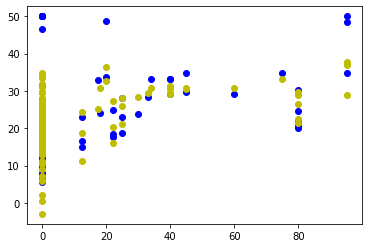

In [58]:
plt.scatter(X_test[:, 1], y_test, color ='b')
plt.scatter(X_test[:, 1], y_pred, color ='y')

plt.show()

## Finding used features

In [43]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=263)
lasso = Lasso().fit(X_train, y_train)

print([names[i] for i in range(len(names)) if lasso.coef_[i] != 0])

['bmi', 's5']


## Central model for argmaxk

In [66]:
x, y = data[: - 1], data[-1]
x = np.array(x)

In [70]:
x_sum = x.sum(axis=0)
print(x_sum)

[1.82839551e+03 5.75000000e+03 5.62328000e+03 3.50000000e+01
 2.80102700e+02 3.17399500e+03 3.46181000e+04 1.91778660e+03
 4.83100000e+03 2.06295000e+05 9.31750000e+03 1.80080160e+05
 6.39457000e+03 1.13897000e+04]


In [73]:
k = 3
d = x.shape[1]

max_val = x_sum.max()
index_zeroed = []
for i in range(d - k):
    index = x_sum.argmin()
    index_zeroed.append(index)
    x_sum[index] = max_val # to avoid being found as min in the next interation
    
for i in index_zeroed:
    x_sum[i] = 0

In [75]:
x_sum # kept the k largest values, and the other were made zero

array([     0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
        34618.1 ,      0.  ,      0.  , 206295.  ,      0.  , 180080.16,
            0.  ,      0.  ])